In [1]:
import pandas as pd
import numpy as np
import os, chardet, glob
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras import Sequential, optimizers, losses, layers

%matplotlib inline
import torch
from torch import nn
from torch import Tensor
import math

In [2]:
import os
for dirname, _, filenames in os.walk('Traindata'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Traindata\AllTrips.csv
Traindata\AllTrips1.csv
Traindata\AllTrips2.csv
Traindata\Overview.xlsx
Traindata\readin.m
Traindata\TripA01.csv
Traindata\TripA02.csv
Traindata\TripA03.csv
Traindata\TripA04.csv
Traindata\TripA05.csv
Traindata\TripA06.csv
Traindata\TripA07.csv
Traindata\TripA08.csv
Traindata\TripA09.csv
Traindata\TripA10.csv
Traindata\TripA11.csv
Traindata\TripA12.csv
Traindata\TripA13.csv
Traindata\TripA14.csv
Traindata\TripA15.csv
Traindata\TripA16.csv
Traindata\TripA17.csv
Traindata\TripA18.csv
Traindata\TripA19.csv
Traindata\TripA20.csv
Traindata\TripA21.csv
Traindata\TripA22.csv
Traindata\TripA23.csv
Traindata\TripA24.csv
Traindata\TripA25.csv
Traindata\TripA26.csv
Traindata\TripA27.csv
Traindata\TripA28.csv
Traindata\TripA29.csv
Traindata\TripA30.csv
Traindata\TripA31.csv
Traindata\TripA32.csv
Traindata\TripB01.csv
Traindata\TripB02.csv
Traindata\TripB03.csv
Traindata\TripB04.csv
Traindata\TripB05.csv
Traindata\TripB06.csv
Traindata\TripB07.csv
Traindata\TripB08.csv
Traind

In [4]:
df_overview = pd.read_excel('Traindata/Overview.xlsx')
df_overview = df_overview.drop(['Unnamed: 13','Note'], axis=1)
df_overview = df_overview.dropna()
df_overview.rename(columns = {'Unnamed: 8':'SoC difference'}, inplace = True)
df_overview.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),SoC difference,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,"Automatic, Level 1"
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,"Automatic, Level 1"
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,"Automatic, Level 1"
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,"Automatic, Level 1"
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,"Automatic, Level 1"


In [5]:
def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    for idx, key in enumerate(measurements):
        plt.subplot(nrows, ncols, idx+1)
        plt.plot(np.array(range(df.shape[0]))*0.1, df[key])
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(measurements[0])
        plt.show

In [6]:
df_master = pd.read_csv('Traindata/AllTrips1.csv')

In [7]:
df_master

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Velocity [km/h]]]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.20,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.40,-2.21,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.40,-2.26,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.30,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.30,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094788,1642.4,NaN,476.0,0.0,2.5,-0.04,0.0,367.15,-4.00,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1094789,1642.5,NaN,476.0,0.0,2.5,-0.04,0.0,367.20,-4.20,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1094790,1642.6,NaN,476.0,0.0,2.5,-0.04,0.0,367.15,-4.05,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1094791,1642.7,NaN,476.0,0.0,2.5,-0.04,0.0,367.10,-3.90,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
df_master = df_master.iloc[: , :-2]
print(list(df_master.columns.values))

['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Coolant Temperature Heatercore [°C]', 'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'Unnamed: 23', 'Ambient Temperature Sensor [°C]', 'Coolant Volume Flow +500 [l/h]', 'Temperature Coolant Heater Inlet [°C]', 'Temperature Coolant Heater Outlet [°C]', 'Temperature Heat Exchanger Outlet [°C]', 'Temperature Defrost lateral left [°C]', 'Temperature Defrost lateral right [°C]', 'Temperatur

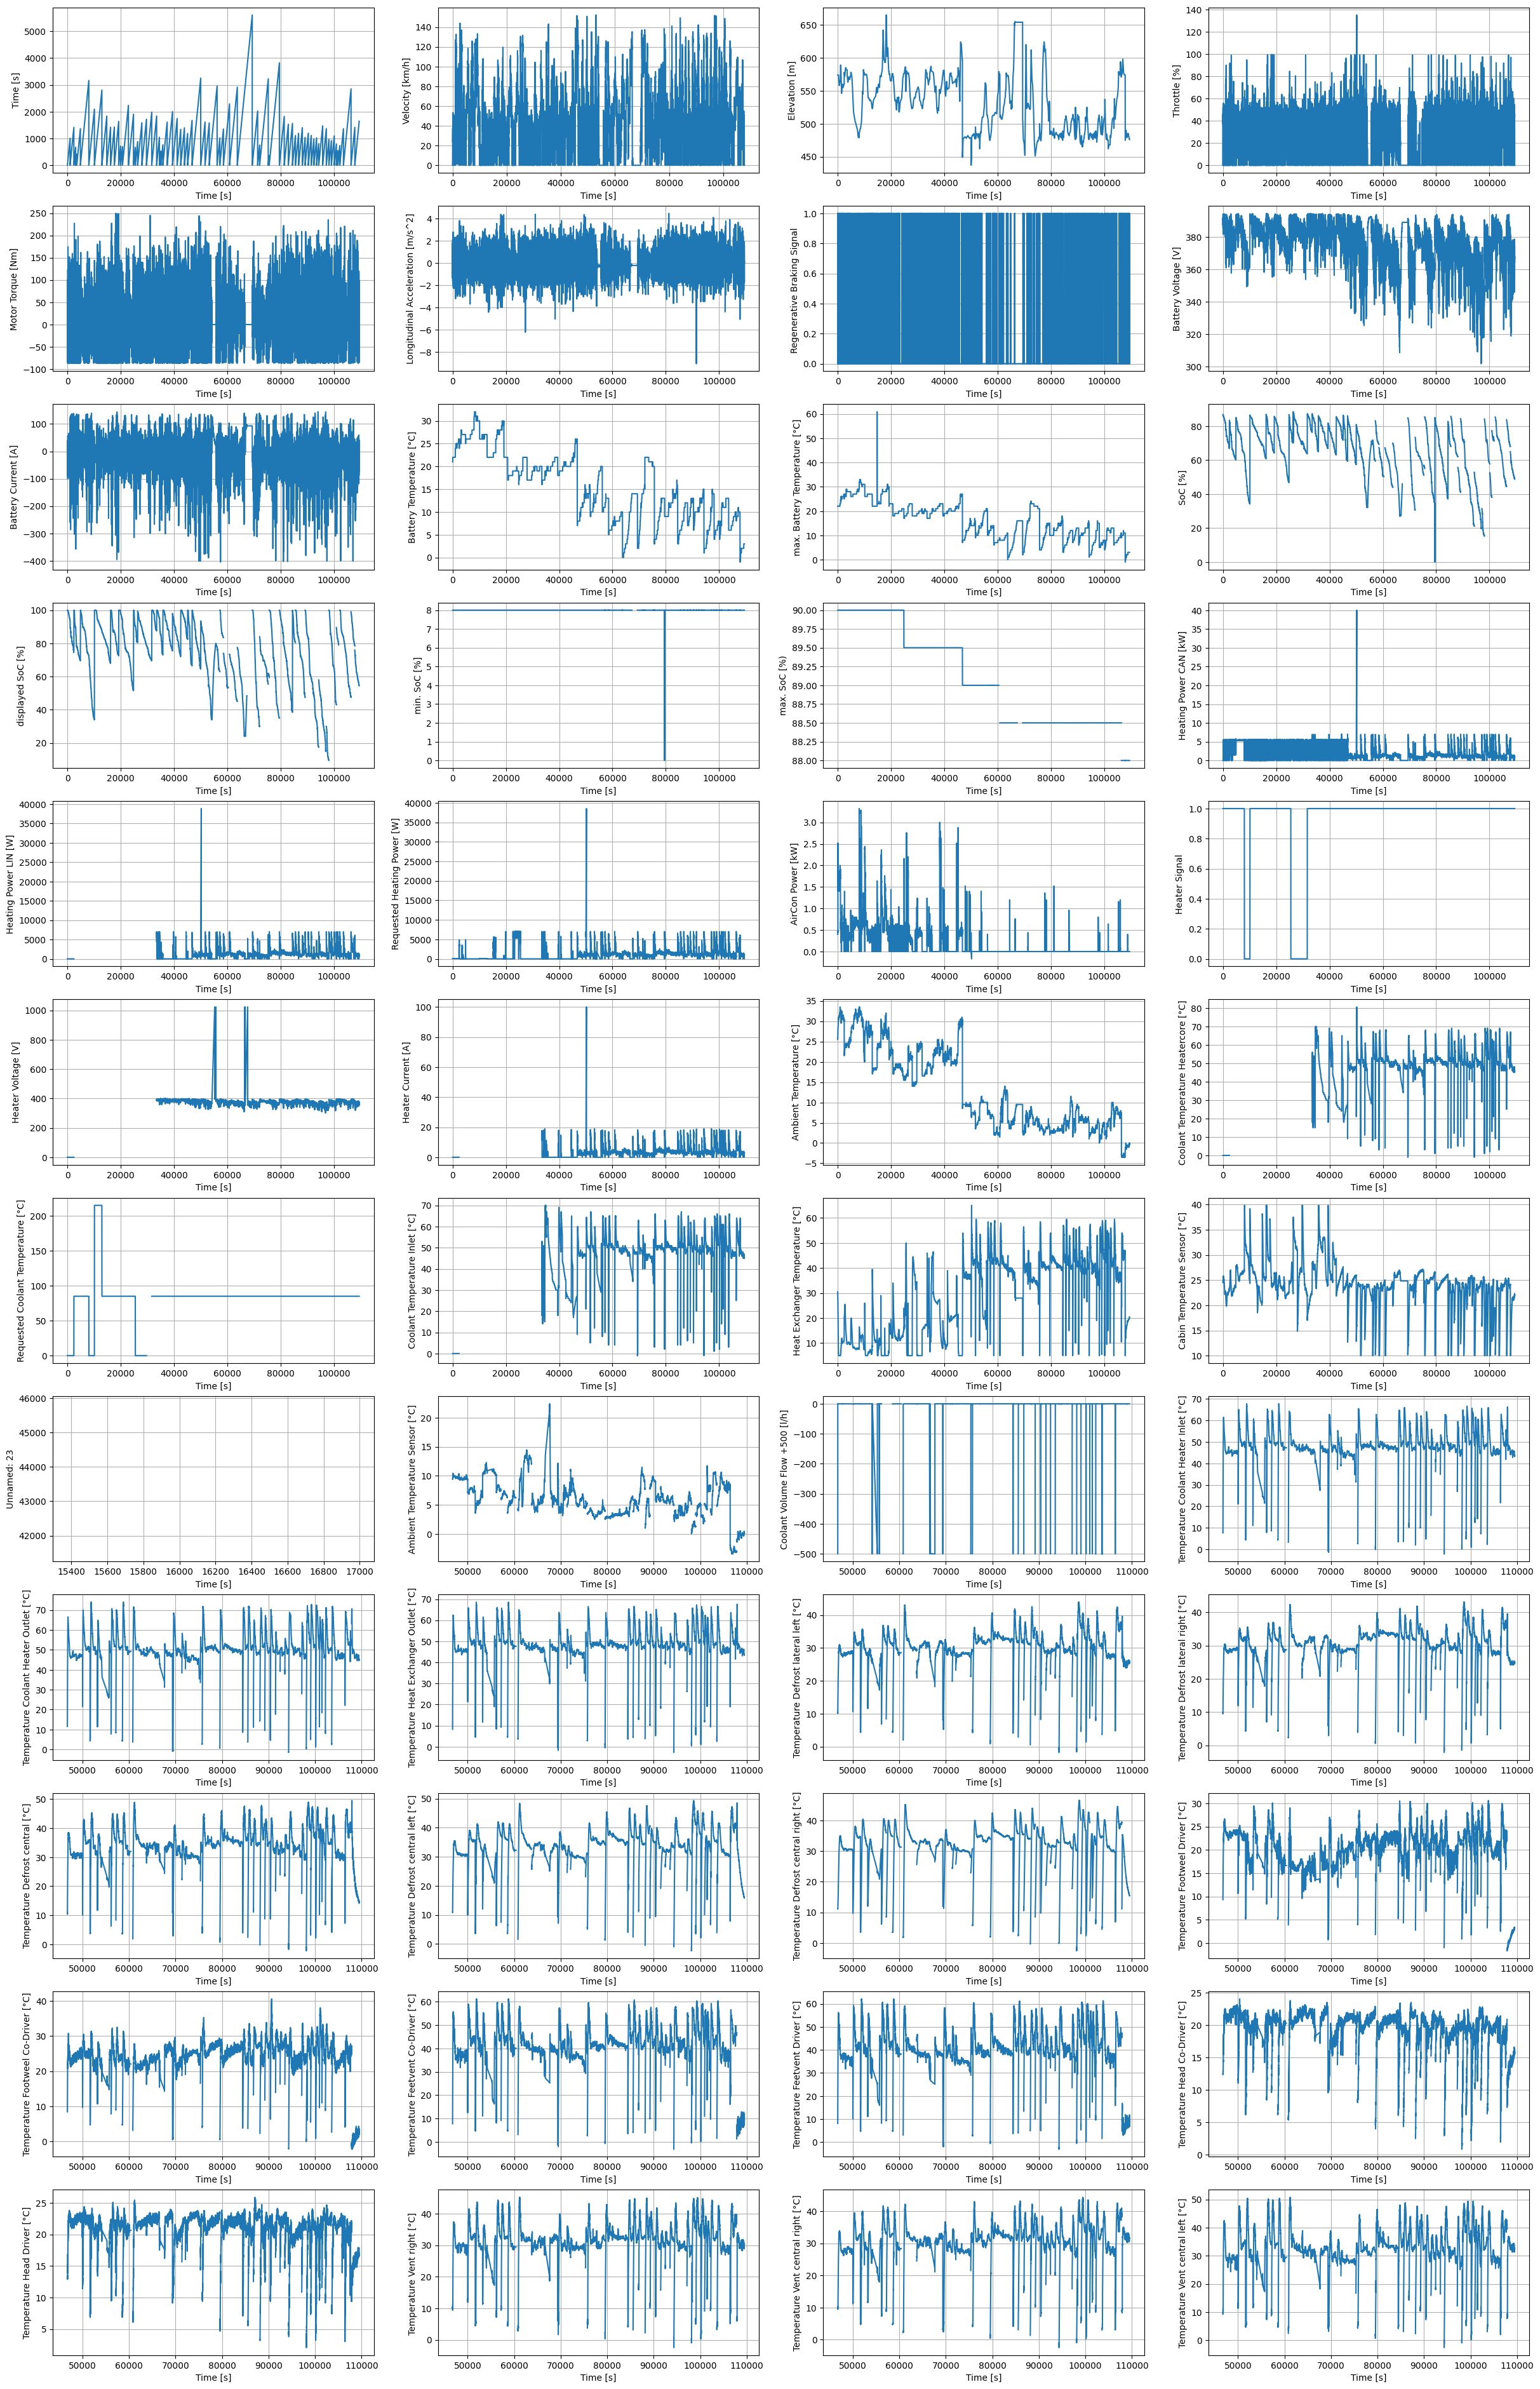

In [9]:
plot_dataframe_subplots(df_master, nrows=12, ncols=4, figsize=(30, 48))

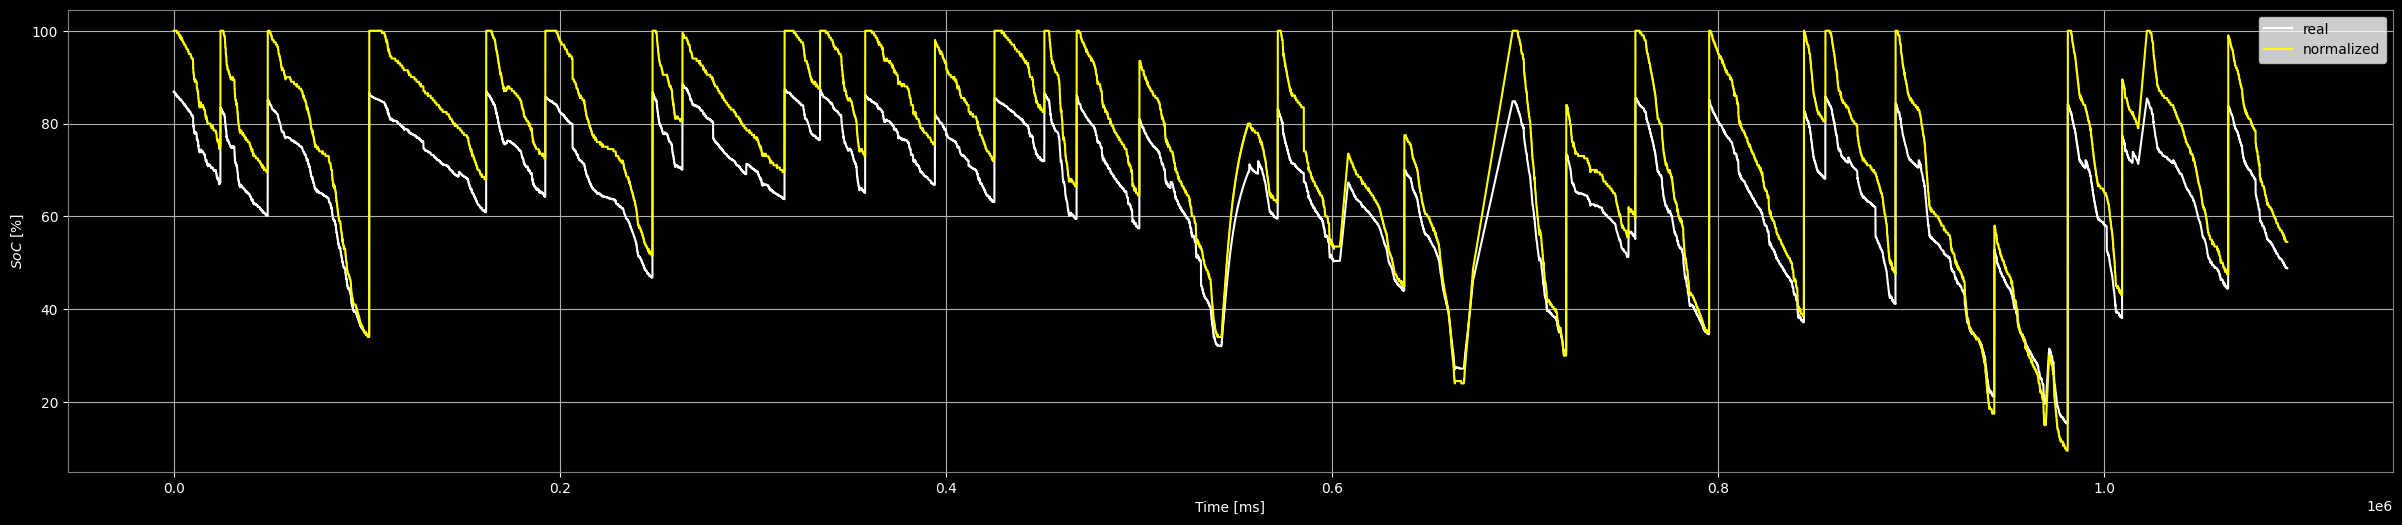

In [10]:
df_soc = df_master[['SoC [%]', 'displayed SoC [%]']].dropna()

plt.figure(figsize=(30, 6), facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(colors='white', which='both')
plt.grid(True)

plt.plot(df_soc['SoC [%]'], color="white")
plt.plot(df_soc['displayed SoC [%]'], color="yellow")
plt.xlabel('Time [ms]', color='white')
plt.ylabel('$SoC$ [%]', color='white')
plt.legend(['real','normalized'])

In [11]:
df_x_y = df_master

In [12]:
df_x_y


,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Defrost central right [°C],Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.20,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.40,-2.21,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.40,-2.26,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.30,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.30,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094788,1642.4,NaN,476.0,0.0,2.5,-0.04,0.0,367.15,-4.00,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094789,1642.5,NaN,476.0,0.0,2.5,-0.04,0.0,367.20,-4.20,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094790,1642.6,NaN,476.0,0.0,2.5,-0.04,0.0,367.15,-4.05,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094791,1642.7,NaN,476.0,0.0,2.5,-0.04,0.0,367.10,-3.90,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_x_y['SoC [%]'] = df_x_y['SoC [%]'].fillna(method='ffill')

df_x_y=df_x_y.dropna(axis=1)
X = df_x_y.drop(['Time [s]','SoC [%]'], axis=1)
X = X.values.reshape(-1, 1, 16)
y = df_x_y[['SoC [%]']]
splitter = int(len(X)*0.7)
X_train = X[:splitter]
X_test = X[splitter:]
y_train = y.values[:splitter]
y_test = y.values[splitter:]
# Check the dataset sizes
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 


((766355, 1, 16), (766355, 1), (328438, 1, 16), (328438, 1))

In [14]:
def regression_matrics(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Root Mean Square Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')

In [15]:
def plot_comparison(y_test, y_pred, xlabel, ylabel, dark_mode=False, figsize=(30, 6)):
    if dark_mode:
        plt.figure(figsize=figsize, facecolor='black')
        ax = plt.axes()
        ax.set_facecolor("black")
        ax.spines['bottom'].set_color('gray')
        ax.spines['top'].set_color('gray')
        ax.spines['right'].set_color('gray')
        ax.spines['left'].set_color('gray')
        ax.tick_params(colors='white', which='both')
        plt.plot(y_pred, color="yellow")
        plt.plot(y_test, color="white")
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel, color='white')
        plt.ylabel(ylabel, color='white')
    else:
        plt.figure(figsize=figsize)
        plt.plot(y_pred)
        plt.plot(y_test)        
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.grid(True)

In [16]:
nan_check = df_x_y.isna()
any_nan = nan_check.any().any()
any_nan

False

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf


def my_custom_activation(x):
    return (x)/(1+x*x/2)

regressor = Sequential([
    Dense(10),
    Activation(my_custom_activation),
    Dense(100),
    Activation(my_custom_activation), 
    Dense(100),
    Activation(my_custom_activation),
    Dense(10),
    Activation(my_custom_activation),
    Dense(1),
])

regressor.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss=losses.mae,
                  metrics=["mae"])
regressor.fit(X_train, y_train, epochs=25, verbose=0)
y_pred_nn = regressor.predict(X_test)
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=False)

Epoch 1/25
23949/23949 - 154s - loss: 18.8959 - mae: 18.8959 - 154s/epoch - 6ms/step
Epoch 2/25
23949/23949 - 150s - loss: 5.6247 - mae: 5.6247 - 150s/epoch - 6ms/step
Epoch 3/25
23949/23949 - 149s - loss: 4.2249 - mae: 4.2249 - 149s/epoch - 6ms/step
Epoch 4/25
23949/23949 - 146s - loss: 3.7730 - mae: 3.7730 - 146s/epoch - 6ms/step
Epoch 5/25
23949/23949 - 145s - loss: 3.4114 - mae: 3.4114 - 145s/epoch - 6ms/step
Epoch 6/25
23949/23949 - 175s - loss: 3.3516 - mae: 3.3516 - 175s/epoch - 7ms/step
Epoch 7/25
23949/23949 - 158s - loss: 3.2220 - mae: 3.2220 - 158s/epoch - 7ms/step
Epoch 8/25
23949/23949 - 162s - loss: 3.0499 - mae: 3.0499 - 162s/epoch - 7ms/step
Epoch 9/25
23949/23949 - 161s - loss: 2.9893 - mae: 2.9893 - 161s/epoch - 7ms/step
Epoch 10/25
23949/23949 - 150s - loss: 2.8928 - mae: 2.8928 - 150s/epoch - 6ms/step
Epoch 11/25
23949/23949 - 166s - loss: 2.8292 - mae: 2.8292 - 166s/epoch - 7ms/step
Epoch 12/25
23949/23949 - 161s - loss: 2.7725 - mae: 2.7725 - 161s/epoch - 7ms/step

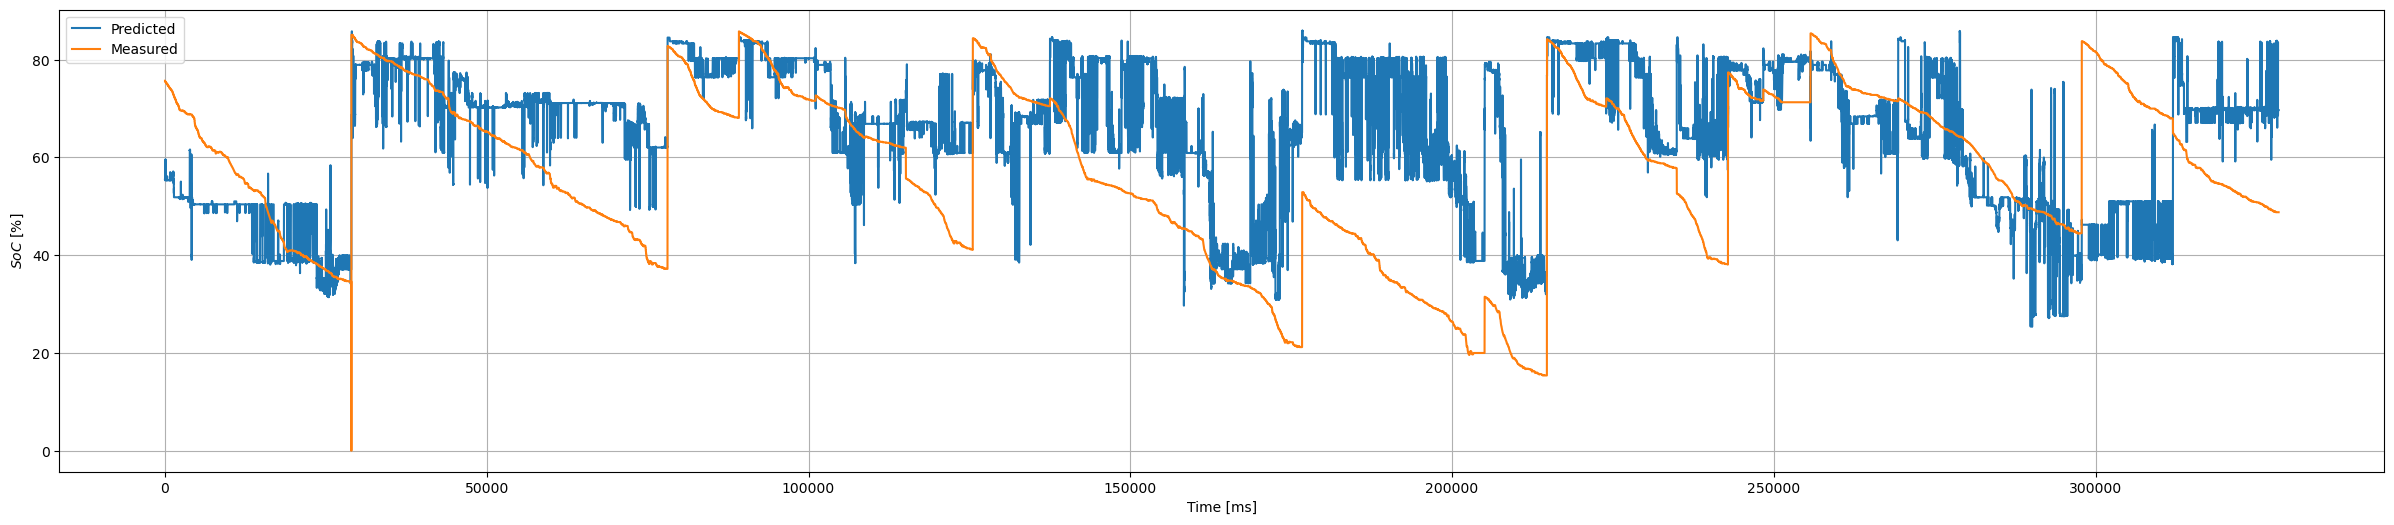

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf


def my_custom_activation(x):
    return (x)/(1+x*x/2)


regressor = Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    Activation(my_custom_activation),
    Dense(8),
    Activation(my_custom_activation),
    Dense(1),
])

regressor.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss=losses.mae,
                  metrics=["mae"])
regressor.fit(X_train, y_train, epochs=25, verbose=2)
y_pred_nn = regressor.predict(X_test)
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=False)
